# Spotify Top 2000 EDA Showcase

Explora las estadísticas de audio de las mejores 2000 canciones en Spotify con este análisis exploratorio de datos. Este repositorio contiene visualizaciones y gráficos informativos que destacan las cualidades de las canciones desde 1956 hasta 2019. Descubre patrones interesantes, como la evolución de la duración de las canciones a lo largo del tiempo, la relación entre el BPM y la energía, y la distribución de la bailabilidad de las canciones. Las visualizaciones están creadas con Seaborn para ofrecer una presentación clara y atractiva de los datos. ¡Sumérgete en el mundo de la música y descubre insights fascinantes!

In [3]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as os

# Data

In [5]:
data=pd.read_csv('Spotify-2000.csv')
data

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

## Verificamos que no existan valores NaN

In [20]:
data.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

## Grafico 1

### Creamos un grafico de barras de la cantidad de Bailabilidad por artista con Seaborn

OBS: Limitamos los datos para poder representarlos de una manera mas optima

En este caso limitamos nuestra data hasta los 50 primeros valores y lo almacenamos en la variable dataset

In [23]:
dataset=data[:49]

Se suprimen las advertencias de la categoría FutureWarning. Esto previene que se muestren mensajes sobre funciones de las bibliotecas que cambiarán en futuras versiones

In [28]:
os.filterwarnings('ignore', category=FutureWarning)

In [29]:
colores = sns.color_palette('hsv', len(dataset['Artist'].unique()))

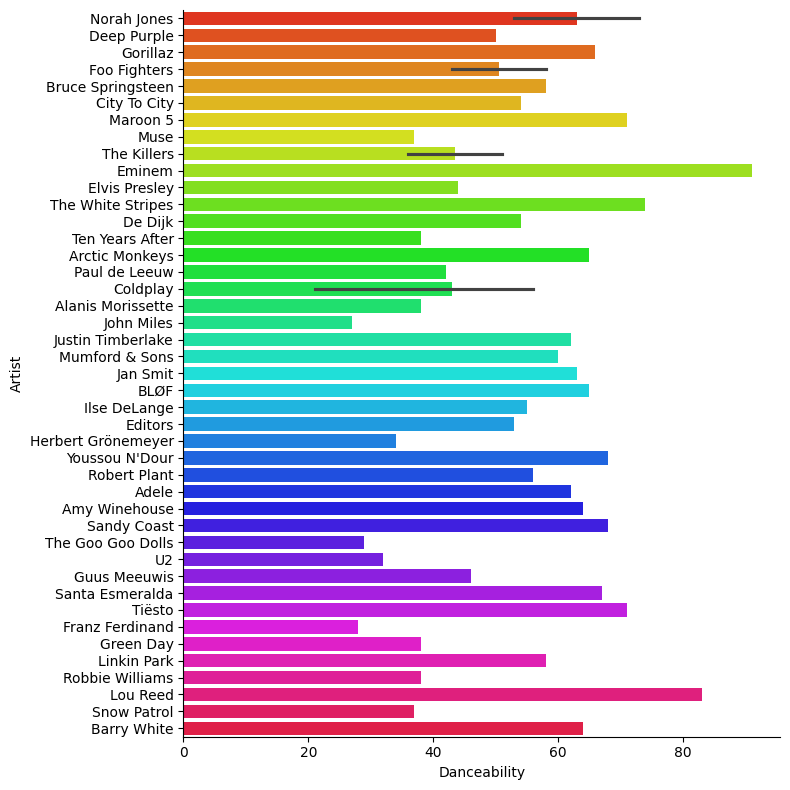

In [27]:
sns.catplot(x='Danceability',
            y='Artist',
            data=dataset,
            kind='bar',
            height=8,
            aspect=1,
            palette= colores)

plt.show()

## Grafico 2

### Creamos un histograma de la popularidad de las canciones con Seaborn

OBS: En este caso usamos la data completa para conocer mejor la popularidad de las canciones a traves de un histograma

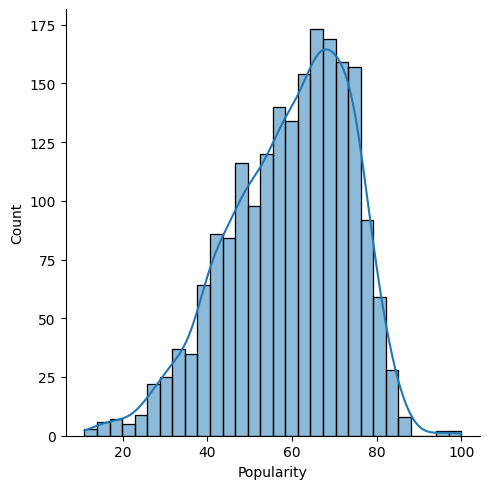

In [8]:
sns.displot(data=data, x='Popularity', bins=30, kde= True)
plt.show()

## Grafico 3

### Creamos un diagrama de dispersión de BPM vs. Energy con Seaborn

OBS: Limitamos los datos para poder representarlos de una manera mas optima

En este caso limitamos nuestra data hasta los 100 primeros valores y lo almacenamos en la variable dataset

In [9]:
dataset=data[:99]

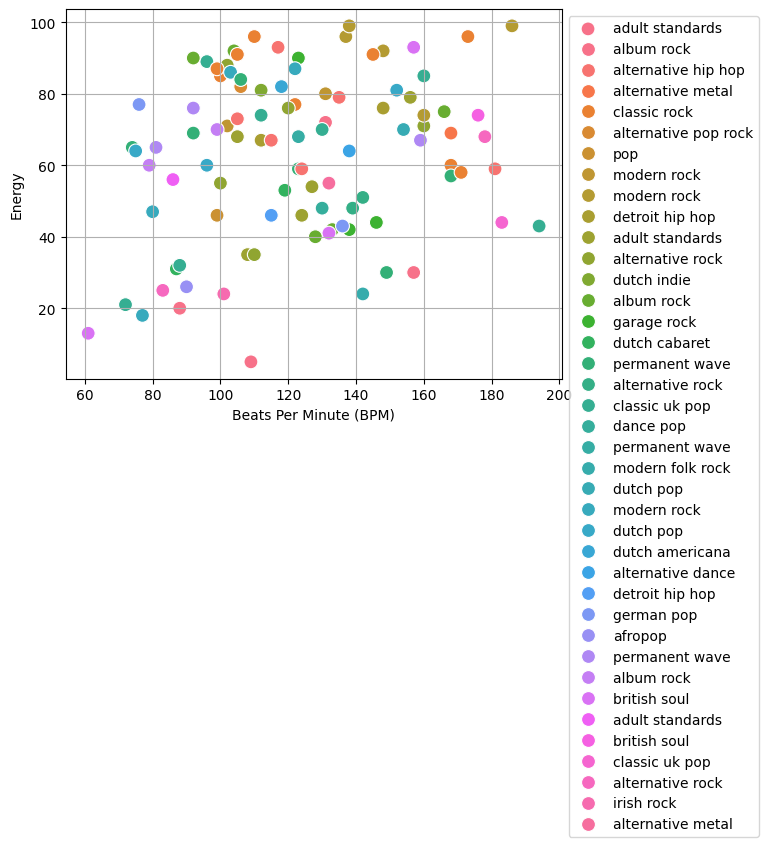

In [10]:
x_axis= dataset['Beats Per Minute (BPM)']
y_axis= dataset['Energy']
sns.scatterplot(x=x_axis, y=y_axis,hue=dataset['Top Genre'], s=100)
plt.legend(labels = dataset['Top Genre'] ,loc = 2, bbox_to_anchor = (1,1))
plt.grid(True)
plt.show()

## Grafico 4

### Creamos un grafico de lineas que muestra la evolucion de la duración de las canciones a lo largo del tiempo con Seaborn

OBS: Limitamos los datos para poder representarlos de una manera mas optima

En este caso limitamos nuestra data hasta los 100 primeros valores y lo almacenamos en la variable dataset

In [11]:
dataset=data[:99]

In [12]:
x_axis = dataset['Year']
y_axis = dataset['Length (Duration)']

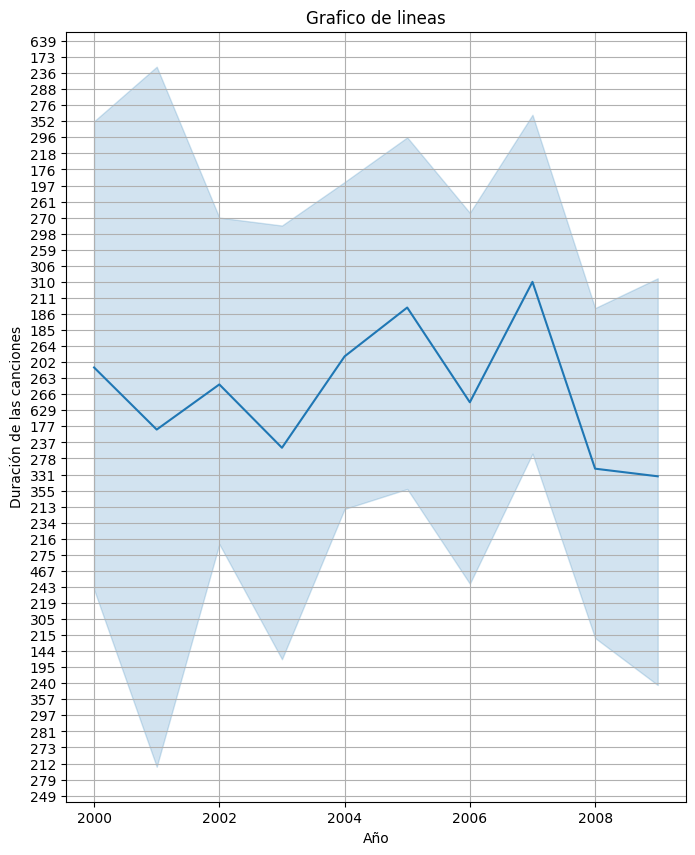

In [13]:
plt.figure(figsize=(8,10))
sns.lineplot(x=x_axis, y=y_axis)
plt.grid(True)
plt.title('Grafico de lineas')
plt.xlabel('Año')
plt.ylabel('Duración de las canciones')
plt.show()

## Grafico 5

### Creamos un diagrama de cajas para mostrar la distribución de los valores de 'Danceability' de las canciones con Seaborn

OBS: Limitamos los datos para poder representarlos de una manera mas optima

En este caso limitamos nuestra data hasta los 100 primeros valores y lo almacenamos en la variable dataset

In [14]:
dataset=data[:99] 

In [17]:
data_sin_index = dataset.drop('Danceability', axis=1)
data_sin_index = dataset.drop('Index', axis=1)

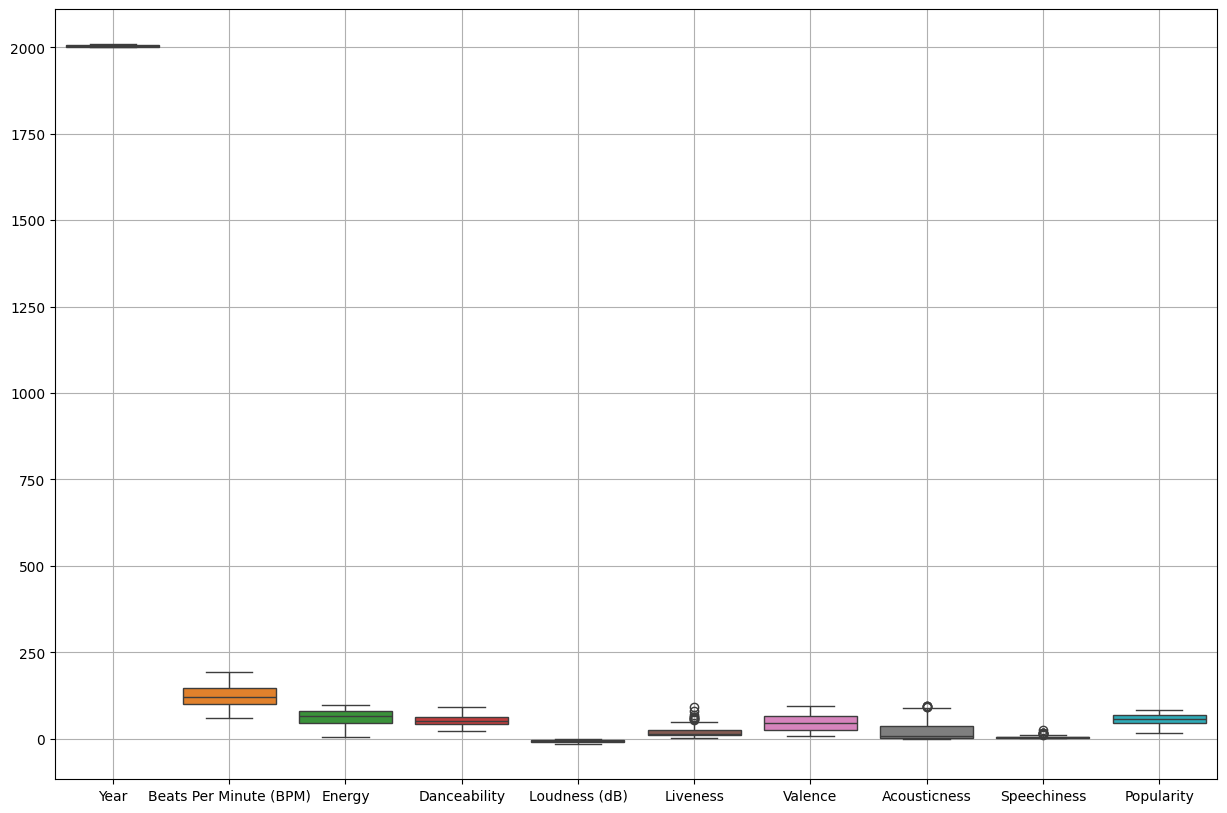

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_sin_index)
plt.grid(True)
plt.show()